# Homework 1 - MLOps Zoomcamp

### Q1

In [39]:
import pandas as pd
import datetime as dt
import pickle # for machine learning models
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import numpy as np

from sklearn.feature_extraction import DictVectorizer # Machine Learning
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn.linear_model import Lasso # Regularization
from sklearn.linear_model import Ridge # Regularization
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
data.shape

(3066766, 19)

### Q2

In [7]:
data['duration']=(data['tpep_dropoff_datetime']-data['tpep_pickup_datetime'])

In [8]:
data['duration']=data['duration'].dt.total_seconds()/60

In [9]:
data['duration'].std()

42.59435124195458

In [10]:
np.std(data['duration'])

42.59434429744777

### Q3

In [11]:
data_without_outliers=data[(data['duration']>=1) & (data['duration']<=60)]

In [12]:
data_without_outliers['duration'].shape[0]/data.shape[0]

0.9812202822125979

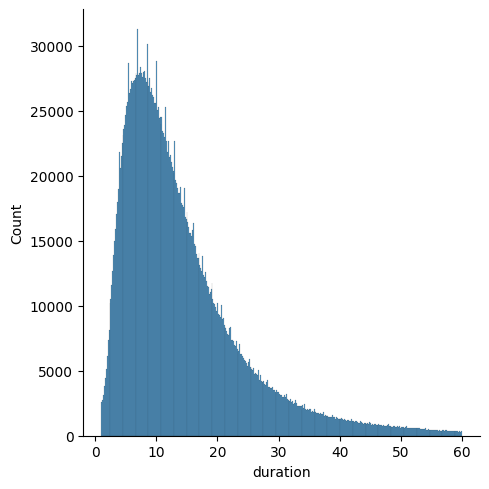

In [13]:
sns.displot(data_without_outliers['duration'])

### Q4

In [21]:
data_without_outliers.PULocationID=data_without_outliers.PULocationID.astype(str)
data_without_outliers.DOLocationID=data_without_outliers.DOLocationID.astype(str)

/tmp/ipykernel_6584/1256392067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers.PULocationID=data_without_outliers.PULocationID.astype(str)
/tmp/ipykernel_6584/1256392067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers.DOLocationID=data_without_outliers.DOLocationID.astype(str)


In [22]:
categorical=['PULocationID','DOLocationID']

In [23]:
# turn the categorical columns into a list of dictionaries
train_dicts=data_without_outliers[categorical].to_dict(orient='records')

In [24]:
# Instantiate a dictionary vectorizer
dv = DictVectorizer()

In [25]:
# Fit the vectorizer and transform the data into a feature matrix
fm = dv.fit_transform(train_dicts)

In [26]:
fm

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [27]:
# Print the dimensionality of the feature matrix
dimensionality = fm.shape
print("Dimensionality:", dimensionality)

Dimensionality: (3009173, 515)


### Q5

In [30]:
y_train=data_without_outliers['duration'].values

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(fm,y_train)

LinearRegression()

In [33]:
y_predict=lr.predict(fm)

/tmp/ipykernel_6584/2984917502.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict,label='Prediction')
/tmp/ipykernel_6584/2984917502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='Real Value')


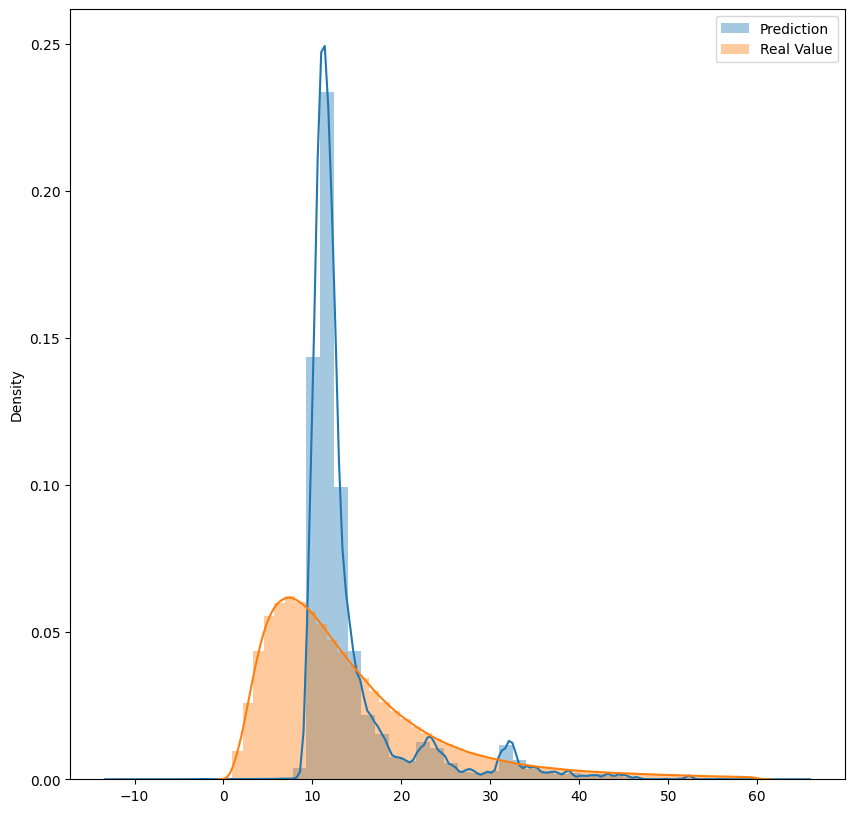

In [37]:
plt.figure(figsize=(10,10))
sns.distplot(y_predict,label='Prediction')
sns.distplot(y_train,label='Real Value')
plt.legend()

In [40]:
mean_squared_error(y_train,y_predict,squared=False)

/home/ariel/.cache/pypoetry/virtualenvs/mlops-zoomcamp-vQfEKNh3-py3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649262236295703

### Q6

In [44]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [45]:
data_feb=read_dataframe('yellow_tripdata_2023-02.parquet')

In [48]:
val_dict=data_feb[categorical].to_dict(orient='records')

In [49]:
X_val=dv.transform(val_dict)

In [52]:
y_real_feb=data_feb['duration'].values

In [53]:
y_predic_feb=lr.predict(X_val)

In [54]:
mean_squared_error(y_pred=y_predic_feb,y_true=y_real_feb,squared=False)

/home/ariel/.cache/pypoetry/virtualenvs/mlops-zoomcamp-vQfEKNh3-py3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.811812822882009